# Diversification

Harold's company wants to build a diversified stock portfolio. So far, it has added `BMO` (Bank of Montreal) and `CNQ` (Canadian Natural Resources Limited), which reside within the Financial Services and Energy sectors in [the S&P TSX 60 index](https://en.wikipedia.org/wiki/S%26P/TSX_60), respectively. Now they want to add a third energy sector stock to the mix.

Harold's manager has asked him to research a set of five energy stocks to add to the existing portfolio. To create a diversified portfolio that tends to minimize long-term volatility/risk, stocks within the portfolio should be as uncorrelated as possible so as to create a counterbalance effect (i.e, when some stocks fall in price, others may rise in price).

Use the Pandas library to help Harold analyze five energy stocks—`CVE`, `ENB`, `IMO`, `IPL`, and `TRP`—and choose the stock with the least correlation to `BMO` and `CNQ`.

## Instructions

## Import libraries and dependencies

In [27]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path
import seaborn as sns

%matplotlib inline

### Read CSV in as DataFrame

In [28]:
# Set file paths
BMO = (r'C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 4\1\02-Stu_Correlation\Resources\BMO.csv')
CNQ = (r'C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 4\1\02-Stu_Correlation\Resources\CNQ.csv')
CVE = (r'C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 4\1\02-Stu_Correlation\Resources\CVE.csv')
ENB = (r'C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 4\1\02-Stu_Correlation\Resources\ENB.csv')
IMO = (r'C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 4\1\02-Stu_Correlation\Resources\IMO.csv')
IPL = (r'C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 4\1\02-Stu_Correlation\Resources\IPL.csv')
TRP = (r'C:\Users\TribThapa\Desktop\Thapa\ResearchFellow\Courses\FinTech_Bootcamp_MonashUni2021\monu-mel-virt-fin-pt-05-2021-u-c\Activities\Week 4\1\02-Stu_Correlation\Resources\TRP.csv')

# Read the individual CSV datasets
bmo_df = pd.read_csv(BMO, infer_datetime_format=True, parse_dates=True, index_col='date')
cnq_df = pd.read_csv(CNQ, infer_datetime_format=True, parse_dates=True, index_col='date')
cve_df = pd.read_csv(CVE, infer_datetime_format=True, parse_dates=True, index_col='date')
enb_df = pd.read_csv(ENB, infer_datetime_format=True, parse_dates=True, index_col='date')
imo_df = pd.read_csv(IMO, infer_datetime_format=True, parse_dates=True, index_col='date')
ipl_df = pd.read_csv(IPL, infer_datetime_format=True, parse_dates=True, index_col='date')
trp_df = pd.read_csv(TRP, infer_datetime_format=True, parse_dates=True, index_col='date')

# Display sample data from `BMO` (all files have the same structure)
cnq_df.head()

,CNQ
date,
2019-05-14,191.62
2019-05-13,190.34
2019-05-10,194.58
2019-05-09,194.58
2019-05-08,195.17


### Combine the DataFrames

In [29]:
# Use the `concat` function to combine the DataFrames by matching indexes (or in this case `date`)
combined_df = pd.concat([bmo_df, cnq_df, cve_df, enb_df, imo_df, ipl_df, trp_df], axis='columns', join='inner')
combined_df

,BMO,CNQ,CVE,ENB,IMO,IPL,TRP
date,,,,,,,
2019-05-14,66.9700,191.62,45.17,27.32,38.51,162.04,41.9700
2019-05-13,66.4900,190.34,44.76,26.24,37.38,158.45,40.9900
2019-05-10,67.2200,194.58,46.20,27.96,38.94,168.82,42.8300
2019-05-09,66.0400,194.58,46.62,27.21,39.27,170.19,43.2500
2019-05-08,66.0200,195.17,49.24,27.09,39.75,173.92,43.7000
...,...,...,...,...,...,...,...
2009-05-20,12.3299,23.83,15.58,4.50,4.80,9.73,10.4677
2009-05-19,12.3875,24.63,15.65,4.39,4.85,9.45,10.5871
2009-05-18,12.1925,26.02,15.52,4.14,4.68,9.27,10.4975


### Calculate Daily Returns

In [30]:
# Use the `pct_change` function to calculate daily returns for each stock
daily_returns = combined_df.pct_change
daily_returns

<bound method NDFrame.pct_change of                 BMO     CNQ    CVE    ENB    IMO     IPL      TRP
date                                                             
2019-05-14  66.9700  191.62  45.17  27.32  38.51  162.04  41.9700
2019-05-13  66.4900  190.34  44.76  26.24  37.38  158.45  40.9900
2019-05-10  67.2200  194.58  46.20  27.96  38.94  168.82  42.8300
2019-05-09  66.0400  194.58  46.62  27.21  39.27  170.19  43.2500
2019-05-08  66.0200  195.17  49.24  27.09  39.75  173.92  43.7000
...             ...     ...    ...    ...    ...     ...      ...
2009-05-20  12.3299   23.83  15.58   4.50   4.80    9.73  10.4677
2009-05-19  12.3875   24.63  15.65   4.39   4.85    9.45  10.5871
2009-05-18  12.1925   26.02  15.52   4.14   4.68    9.27  10.4975
2009-05-15  11.7316   24.40  15.19   4.01   4.24    8.74   9.9701
2009-05-14  11.9665   24.53  15.54   4.24   4.55    8.52  10.2488

[2517 rows x 7 columns]>

### Calculate Correlation

In [31]:
# Use the `corr` function to calculate correlations for each stock pair
correlation = combined_df.corr()
correlation

,BMO,CNQ,CVE,ENB,IMO,IPL,TRP
BMO,1.000000,0.746358,0.758800,0.457306,0.806984,0.626053,0.764274
CNQ,0.746358,1.000000,0.933007,0.587748,0.840312,0.849410,0.974018
CVE,0.758800,0.933007,1.000000,0.666676,0.893173,0.866886,0.935083
ENB,0.457306,0.587748,0.666676,1.000000,0.588189,0.791445,0.652670
IMO,0.806984,0.840312,0.893173,0.588189,1.000000,0.843455,0.868179
IPL,0.626053,0.849410,0.866886,0.791445,0.843455,1.000000,0.904970
TRP,0.764274,0.974018,0.935083,0.652670,0.868179,0.904970,1.000000


### Plot Correlation

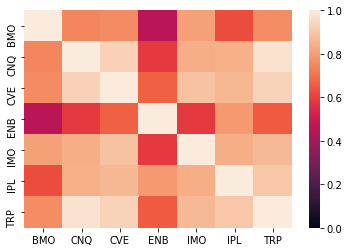

In [32]:
# Create a heatmap from the correlation values
sns.heatmap(correlation, vmin=0, vmax=1)

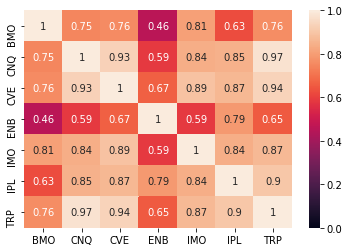

In [33]:
sns.heatmap(correlation, vmin=0, vmax=1, annot=True)

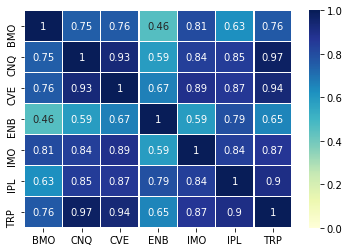

In [34]:
sns.heatmap(correlation, vmin=0, vmax=1, annot=True, linewidths=0.5, cmap="YlGnBu")

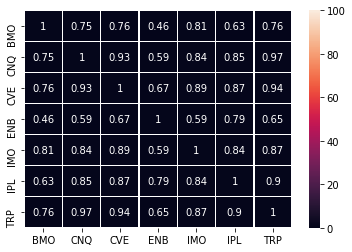

In [35]:
# Create a heatmap from the correlation values and adjust the scale
sns.heatmap(correlation, vmin=0, vmax=100, annot=True, linewidths=0.5)

### Which energy stock would be the best candidate to add to the existing portfolio?

**ENB**